In [14]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

In [15]:
# ===============================
# 📌 기본 라이브러리
# ===============================
import pandas as pd
import numpy as np

# ===============================
# 📌 시각화 라이브러리
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 📌 경고 메시지 제거 (대용량 CSV 처리 시 깔끔)
# ===============================
import warnings
warnings.filterwarnings("ignore")

# ===============================
# 📌 한글 폰트 설정 (Windows)
# ===============================
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [16]:
# ===============================
# 📌 CSV에서 불러올 컬럼 지정
# (불필요한 컬럼 제거 → 메모리 절약)
# ===============================
use_cols = [
    '인허가일자',
    '상세영업상태명',
    '폐업일자',
    '소재지전체주소',
    '도로명전체주소',
    '업태구분명',
    '좌표정보x(epsg5174)',
    '좌표정보y(epsg5174)',
    '사업장명'
]


In [18]:
# ===============================
# 📌 데이터 로드
# ===============================
df = pd.read_csv(
    r"C:\ai\lecNote\1st_Project\data\서울_일반음식점_인허가일자_2022까지.csv",
    encoding="UTF-8",
    usecols=use_cols,
    low_memory=False
)

In [19]:
df.head()


,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보x(epsg5174),좌표정보y(epsg5174)
0,2020-08-03,영업,NaN,서울특별시 강서구 화곡동 827-2 1층,"서울특별시 강서구 등촌로13다길 35, 1층 (화곡동)",꾸어가게생선구이화곡점,한식,187499.286366,448069.583478
1,2020-08-03,영업,NaN,서울특별시 광진구 광장동 322-6,"서울특별시 광진구 아차산로76가길 5, 1층 (광장동)",37.5광진점,기타,209442.103893,449442.721078
2,2020-08-03,영업,NaN,서울특별시 은평구 대조동 68-2,"서울특별시 은평구 역말로10길 32, 1층 우측호 (대조동)",베엔타,출장조리,193206.049815,456310.309764
3,2020-08-03,영업,NaN,서울특별시 은평구 진관동 296-12,"서울특별시 은평구 북한산로 271-3, 2층 (진관동)","북한산큰숲,제빵소",한식,194550.757271,461372.337336
4,2020-08-03,영업,NaN,서울특별시 강남구 신사동 613-5 캐럴라인타워,"서울특별시 강남구 압구정로32길 11, 캐럴라인타워 지상1층 107호 (신사동)",코이라멘 압구정점,일식,202601.216639,447186.659483


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283739 entries, 0 to 283738
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   인허가일자            283739 non-null  object 
 1   상세영업상태명          283739 non-null  object 
 2   폐업일자             207756 non-null  object 
 3   소재지전체주소          283528 non-null  object 
 4   도로명전체주소          202763 non-null  object 
 5   사업장명             283738 non-null  object 
 6   업태구분명            283725 non-null  object 
 7   좌표정보x(epsg5174)  283739 non-null  float64
 8   좌표정보y(epsg5174)  283739 non-null  float64
dtypes: float64(2), object(7)
memory usage: 19.5+ MB


In [21]:
df.isna().sum()


인허가일자                  0
상세영업상태명                0
폐업일자               75983
소재지전체주소              211
도로명전체주소            80976
사업장명                   1
업태구분명                 14
좌표정보x(epsg5174)        0
좌표정보y(epsg5174)        0
dtype: int64

In [22]:
# 소재지 주소가 있으면 우선 사용, 없으면 도로명 주소 사용
df['주소'] = df['소재지전체주소'].fillna(df['도로명전체주소'])


In [23]:
df['주소'].isna().sum()


0

In [24]:
# 주소 문자열에서 '○○구' 패턴 추출
df['구'] = df['주소'].str.extract(r'(서울특별시\s*)?(\w+구)')[1]
# 구 정보 없는 행 제거
df[['주소', '구']].head()

,주소,구
0,서울특별시 강서구 화곡동 827-2 1층,강서구
1,서울특별시 광진구 광장동 322-6,광진구
2,서울특별시 은평구 대조동 68-2,은평구
3,서울특별시 은평구 진관동 296-12,은평구
4,서울특별시 강남구 신사동 613-5 캐럴라인타워,강남구


In [25]:
# '구' 결측치 제거
df['구'].isna().sum()
df = df[df['구'].notna()].copy()

In [26]:
# 서울특별시 데이터만 유지 (타 지역 자동 제거)
df = df[df['주소'].str.contains('서울', na=False)].copy()


In [27]:
# 문자열 → datetime 변환
df['인허가일자'] = pd.to_datetime(df['인허가일자'], errors='coerce')
df['폐업일자'] = pd.to_datetime(df['폐업일자'], errors='coerce')

# 인허가일자 없는 행 제거
df = df[df['인허가일자'].notna()].copy()

# ✅ 2000년 이후만 사용
df = df[df['인허가일자'] >= '2000-01-01'].copy()

# 좌표 결측치 제거
df = df[
    df['좌표정보x(epsg5174)'].notna() &
    df['좌표정보y(epsg5174)'].notna()
].copy()

In [28]:
# 창업월, 창업연도
df['창업월'] = df['인허가일자'].dt.month
df['창업연도'] = df['인허가일자'].dt.year


In [29]:
# 영업 기간 계산 
df['영업일수'] = (
    df['폐업일자'].fillna(pd.Timestamp.today())
    - df['인허가일자']
).dt.days

In [30]:
#3년 이내 폐업 여부
df['폐업_3년이내'] = (
    (df['폐업일자'].notna()) &
    (df['영업일수'] <= 365 * 3)
).astype(int)

In [31]:
#문자열의 앞뒤 공백을 제거
df['업태'] = df['업태구분명'].str.strip()


In [32]:
# 업태 빈도
type_counts = df['업태'].value_counts()

# 10개 이하 업태 목록
rare_types = type_counts[type_counts <= 10].index

rare_types

Index(['커피숍', '기타 휴게음식점', '일반조리판매', '다방', '제과점영업', '식품소분업'], dtype='object')

In [33]:
# 표본 10개 이하 업태 → 기타로 통합
df['업태_정리'] = df['업태'].replace(rare_types, '기타')

In [34]:
KEYWORD_GROUPS = {
    '카페': ['카페', '커피', 'coffee', 'COFFEE','케이크', '까페', 'cafe', 'CAFÉ', '다방', '샐러드', '프레소', '티', '차', '디저트'],
    '한식': ['식당', '찜', '전골', '전', '음식점', '밥상', '한식', '순대', '찌개', '구이' ,'곱창', '국수', '고기', '구이', '국', '밥', '마당', '옥', '관', '떡볶이', '김밥'],
    '주점/치킨': ['크리스피', 'KFC', 'kfc', '치킨', '비비큐', 'bbq',  'BBQ', '후라이드', '술집', '주점', '포장마차', '술', '호프', '건배', '맥주', '포차','펍','pup' ,'PUP', '주점', '바', '룸' ,'와인', '포차','소주', '맥주', '아지트', '잔', '위스키', '클럽'],
    '양식/외식': ['베이커리', '빵', '아웃백'],
    '중/일식': ['마라탕','양꼬치','샤브']
}

In [35]:
def reclassify_etc(row):
    if row['업태_정리'] != '기타':
        return row['업태_정리']

    text = f"{row['사업장명']} {row['업태']}".lower()

    for group, keywords in KEYWORD_GROUPS.items():
        for kw in keywords:
            if kw.lower() in text:
                return group

    return '기타'

df['업태_최종'] = df.apply(reclassify_etc, axis=1)

df['업태_최종'].value_counts()

한식                 118843
호프/통닭               28292
분식                  28001
기타                  23145
경양식                 21807
일식                  12900
중국식                  8211
통닭(치킨)               7726
까페                   7074
카페                   6685
정종/대포집/소주방           5904
패스트푸드                2904
주점/치킨                2376
외국음식전문점(인도,태국등)      2255
식육(숯불구이)             1456
김밥(도시락)              1433
횟집                   1267
뷔페식                  1130
감성주점                  356
탕류(보신용)               299
라이브카페                 293
패밀리레스트랑               262
출장조리                  240
전통찻집                  216
양식/외식                 169
냉면집                   153
중/일식                  144
키즈카페                  102
복어취급                   65
이동조리                   17
Name: 업태_최종, dtype: int64

In [36]:
def map_category(x):
    if pd.isna(x):
        return '기타'

    # 🔹 이미 대분류면 그대로 유지
    if x in ['한식', '카페', '주점/치킨', '양식/외식', '중/일식']:
        return x

    # 🔹 세부 업태 → 대분류
    if x in ['탕류(보신용)', '냉면집', '식육(숯불구이)']:
        return '한식'

    if x in ['분식', '김밥(도시락)', '패스트푸드']:
        return '분식/간편식'

    if x in ['경양식', '패밀리레스트랑', '외국음식전문점(인도,태국등)', '뷔페식']:
        return '양식/외식'

    if x in ['중국식', '일식']:
        return '중/일식'

    if x in ['호프/통닭', '정종/대포집/소주방', '통닭(치킨)', '감성주점', '간이주점', '룸살롱']:
        return '주점/치킨'

    if x in ['까페', '커피숍', '전통찻집', '라이브카페', '다방', '키즈카페']:
        return '카페'

    return '기타'


In [37]:
df['업태_그룹'] = df['업태_최종'].apply(map_category)

In [38]:
df['업태_그룹'].value_counts()

한식        120751
주점/치킨      44654
분식/간편식     32338
양식/외식      25623
기타         24748
중/일식       21255
카페         14370
Name: 업태_그룹, dtype: int64

In [39]:
# 업태 그룹별 3년 이내 폐업률 (%)로 출력
(
    df.groupby('업태_그룹')['폐업_3년이내']
      .mean()
      .mul(100)
      .round(1)
      .sort_values()
)


업태_그룹
중/일식      29.0
카페        29.6
주점/치킨     30.9
양식/외식     31.1
한식        32.3
기타        34.9
분식/간편식    40.7
Name: 폐업_3년이내, dtype: float64

In [40]:
# 구별 폐업률
gu_rate = (
    df.groupby('구')['폐업_3년이내']
    .mean()
    .sort_values(ascending=False)
)

gu_rate.mul(100).round(1).head(10)


구
강동구     39.4
양천구     37.9
구로구     35.9
관악구     35.7
도봉구     35.1
송파구     34.2
중랑구     34.1
노원구     34.0
강북구     33.8
동대문구    33.6
Name: 폐업_3년이내, dtype: float64

In [41]:
# ===============================
#  구 × 업태 그룹 폐업률 Pivot
# ===============================
pivot_gu_type = df.pivot_table(
    values='폐업_3년이내',
    index='구',
    columns='업태_그룹',
    aggfunc='mean'
)


In [43]:
pivot_gu_type_pct = pivot_gu_type.mul(100).round(1)
pivot_gu_type_pct

업태_그룹,기타,분식/간편식,양식/외식,주점/치킨,중/일식,카페,한식
구,,,,,,,
강남구,41.5,35.1,31.7,35.1,29.8,37.1,32.2
강동구,42.5,52.0,37.5,37.0,29.8,30.4,38.3
강북구,34.4,45.9,28.3,31.3,31.2,24.1,33.3
강서구,29.1,37.0,36.4,31.4,32.5,29.7,33.8
관악구,35.9,41.7,35.8,31.8,34.6,33.8,35.7
광진구,36.4,44.0,37.1,26.6,27.5,27.4,34.3
구로구,42.8,42.2,32.7,32.3,31.1,37.7,36.1
금천구,34.1,41.2,32.5,31.1,32.5,28.7,32.9
노원구,36.9,42.0,30.7,31.1,30.9,25.9,33.5


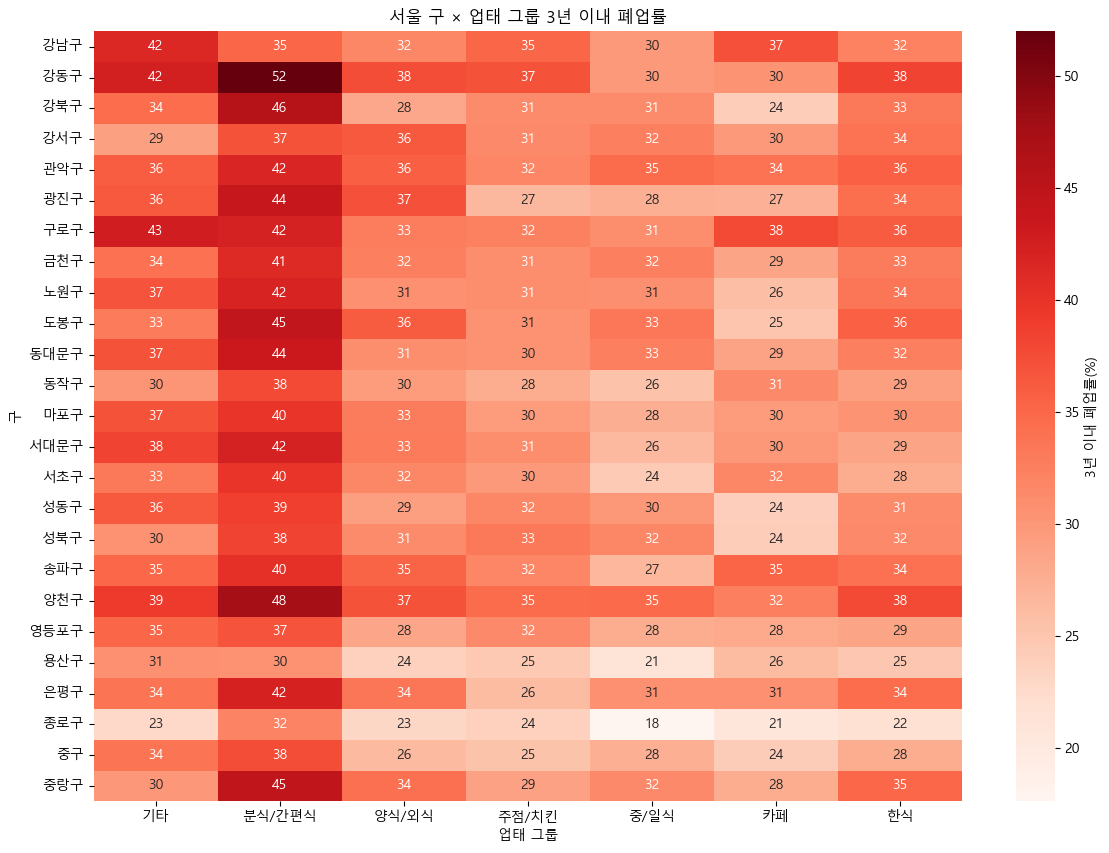

In [44]:
# ===============================
#  히트맵 시각화
# ===============================
plt.figure(figsize=(14,10))
sns.heatmap(
    pivot_gu_type_pct,
    cmap='Reds',
    annot=True,
    cbar_kws={'label': '3년 이내 폐업률(%)'}
)
plt.title('서울 구 × 업태 그룹 3년 이내 폐업률')
plt.xlabel('업태 그룹')
plt.ylabel('구')
plt.show()


In [45]:
# ===============================
#  위험 조합 TOP 추출
# ===============================
risk_table = pivot_gu_type_pct.stack().reset_index()
risk_table.columns = ['구', '업태_그룹', '폐업률']
risk_table.sort_values('폐업률', ascending=False).head(10)

,구,업태_그룹,폐업률
8,강동구,분식/간편식,52.0
127,양천구,분식/간편식,47.6
15,강북구,분식/간편식,45.9
169,중랑구,분식/간편식,44.7
64,도봉구,분식/간편식,44.6
36,광진구,분식/간편식,44.0
71,동대문구,분식/간편식,43.5
42,구로구,기타,42.8
7,강동구,기타,42.5
92,서대문구,분식/간편식,42.3


In [46]:
# ===============================
#  지도 시각화용 라이브러리 아나콘다에 설치.
#  아나콘다 프롬프트에서
#  conda install -c conda-forge geopandas 
# ===============================

import geopandas as gpd
from shapely.geometry import Point

gpd.__version__


'0.12.0'

In [47]:
gu_rate_map = (
    df.groupby('구')['폐업_3년이내']
      .mean()
      .mul(100)
      .round(1)
      .reset_index()
)

gu_rate_map.sort_values('폐업_3년이내', ascending=False).head()


,구,폐업_3년이내
1,강동구,39.4
18,양천구,37.9
6,구로구,35.9
4,관악구,35.7
9,도봉구,35.1


In [48]:
seoul_map = gpd.read_file(
    "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
)

seoul_map.head()


,code,name,name_eng,base_year,geometry
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.11520 37.55753, 127.11880 37.557..."
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.06907 37.52228, 127.07496 37.520..."
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.05867 37.52630, 127.06907 37.522..."
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.01397 37.52504, 127.01918 37.520..."
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.98368 37.47386, 126.98464 37.469..."


In [49]:
# 지도 쪽 구 이름 컬럼 통일
seoul_map['구'] = seoul_map['name']

# merge
map_df = seoul_map.merge(
    gu_rate_map,
    on='구',
    how='left'
)

map_df

,code,name,name_eng,base_year,geometry,구,폐업_3년이내
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.11520 37.55753, 127.11880 37.557...",강동구,39.4
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.06907 37.52228, 127.07496 37.520...",송파구,34.2
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.05867 37.52630, 127.06907 37.522...",강남구,33.3
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.01397 37.52504, 127.01918 37.520...",서초구,30.3
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.98368 37.47386, 126.98464 37.469...",관악구,35.7
5,11200,동작구,Dongjak-gu,2013,"POLYGON ((126.98224 37.50931, 126.98242 37.501...",동작구,30.0
6,11190,영등포구,Yeongdeungpo-gu,2013,"POLYGON ((126.89185 37.54737, 126.90281 37.541...",영등포구,30.3
7,11180,금천구,Geumcheon-gu,2013,"POLYGON ((126.90156 37.47754, 126.90277 37.476...",금천구,33.2
8,11170,구로구,Guro-gu,2013,"POLYGON ((126.82688 37.50549, 126.83122 37.505...",구로구,35.9
9,11160,강서구,Gangseo-gu,2013,"POLYGON ((126.85984 37.57185, 126.85950 37.568...",강서구,33.5


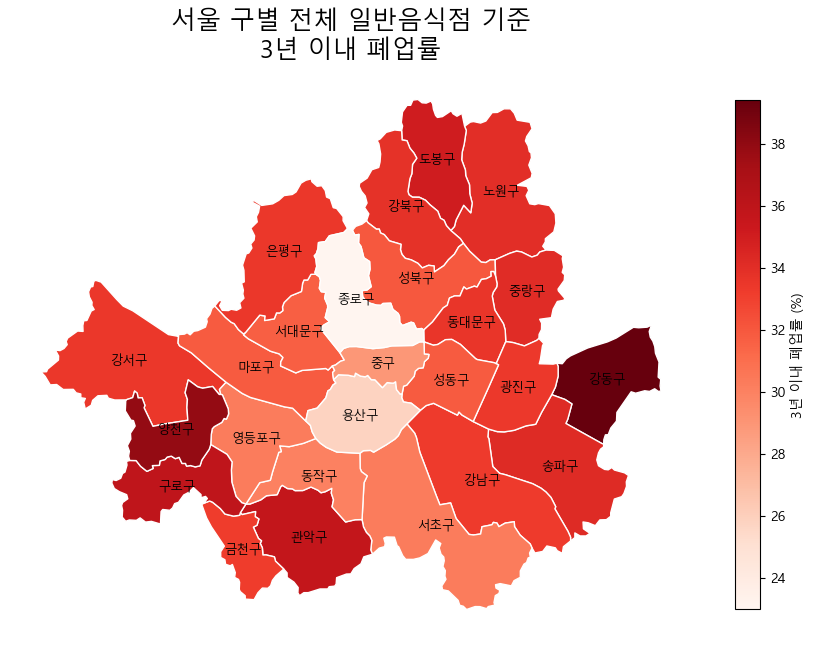

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(11, 11))

# 1️⃣ 지도 색칠
map_df.plot(
    column='폐업_3년이내',
    cmap='Reds',
    linewidth=1,
    ax=ax,
    edgecolor='white',
    legend=True,
    legend_kwds={
        'label': '3년 이내 폐업률 (%)',
        'shrink': 0.6
    }
)

# 2️⃣ 구 이름 표시 (centroid 사용)
for idx, row in map_df.iterrows():
    if row['geometry'] is not None:
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        ax.text(
            x, y,
            row['구'],
            fontsize=9,
            ha='center',
            va='center',
            color='black'
        )

# 3️⃣ 제목
ax.set_title(
    '서울 구별 전체 일반음식점 기준\n3년 이내 폐업률',
    fontsize=18,
    pad=12
)

ax.axis('off')
plt.show()


In [51]:
df['생존_3년이상'] = (
    (df['폐업일자'].isna()) &
    (df['영업일수'] >= 365 * 3)
)
df['생존_3년이상'].value_counts()

False    207852
True      75887
Name: 생존_3년이상, dtype: int64

In [52]:
df['상태'] = '기타'

df.loc[df['폐업_3년이내'] == 1, '상태'] = '폐업(3년 이내)'
df.loc[df['생존_3년이상'] == True, '상태'] = '3년 이상 영업중'


In [53]:
gdf_points = gpd.GeoDataFrame(
    df[df['상태'].isin(['폐업(3년 이내)', '3년 이상 영업중'])],
    geometry=[
        Point(xy) for xy in zip(
            df.loc[df['상태'].isin(['폐업(3년 이내)', '3년 이상 영업중']), '좌표정보x(epsg5174)'],
            df.loc[df['상태'].isin(['폐업(3년 이내)', '3년 이상 영업중']), '좌표정보y(epsg5174)']
        )
    ],
    crs="EPSG:5174"
)


In [54]:

gdf_points = gpd.GeoDataFrame(
    df,
    geometry=[
        Point(xy) for xy in zip(
            df['좌표정보x(epsg5174)'],
            df['좌표정보y(epsg5174)']
        )
    ],
    crs="EPSG:5174"
)

gdf_points.head()


,인허가일자,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보x(epsg5174),좌표정보y(epsg5174),주소,...,창업연도,영업일수,폐업_3년이내,업태,업태_정리,업태_최종,업태_그룹,생존_3년이상,상태,geometry
0,2020-08-03,영업,NaT,서울특별시 강서구 화곡동 827-2 1층,"서울특별시 강서구 등촌로13다길 35, 1층 (화곡동)",꾸어가게생선구이화곡점,한식,187499.286366,448069.583478,서울특별시 강서구 화곡동 827-2 1층,...,2020,1968,0,한식,한식,한식,한식,True,3년 이상 영업중,POINT (187499.286 448069.583)
1,2020-08-03,영업,NaT,서울특별시 광진구 광장동 322-6,"서울특별시 광진구 아차산로76가길 5, 1층 (광장동)",37.5광진점,기타,209442.103893,449442.721078,서울특별시 광진구 광장동 322-6,...,2020,1968,0,기타,기타,기타,기타,True,3년 이상 영업중,POINT (209442.104 449442.721)
2,2020-08-03,영업,NaT,서울특별시 은평구 대조동 68-2,"서울특별시 은평구 역말로10길 32, 1층 우측호 (대조동)",베엔타,출장조리,193206.049815,456310.309764,서울특별시 은평구 대조동 68-2,...,2020,1968,0,출장조리,출장조리,출장조리,기타,True,3년 이상 영업중,POINT (193206.050 456310.310)
3,2020-08-03,영업,NaT,서울특별시 은평구 진관동 296-12,"서울특별시 은평구 북한산로 271-3, 2층 (진관동)","북한산큰숲,제빵소",한식,194550.757271,461372.337336,서울특별시 은평구 진관동 296-12,...,2020,1968,0,한식,한식,한식,한식,True,3년 이상 영업중,POINT (194550.757 461372.337)
4,2020-08-03,영업,NaT,서울특별시 강남구 신사동 613-5 캐럴라인타워,"서울특별시 강남구 압구정로32길 11, 캐럴라인타워 지상1층 107호 (신사동)",코이라멘 압구정점,일식,202601.216639,447186.659483,서울특별시 강남구 신사동 613-5 캐럴라인타워,...,2020,1968,0,일식,일식,일식,중/일식,True,3년 이상 영업중,POINT (202601.217 447186.659)


In [55]:
# 구 × 업태그룹 3년 이상 생존률
pivot = (
    df.pivot_table(
        index="구",
        columns="업태_그룹",
        values="생존_3년이상",
        aggfunc="mean"
    ) * 100
)

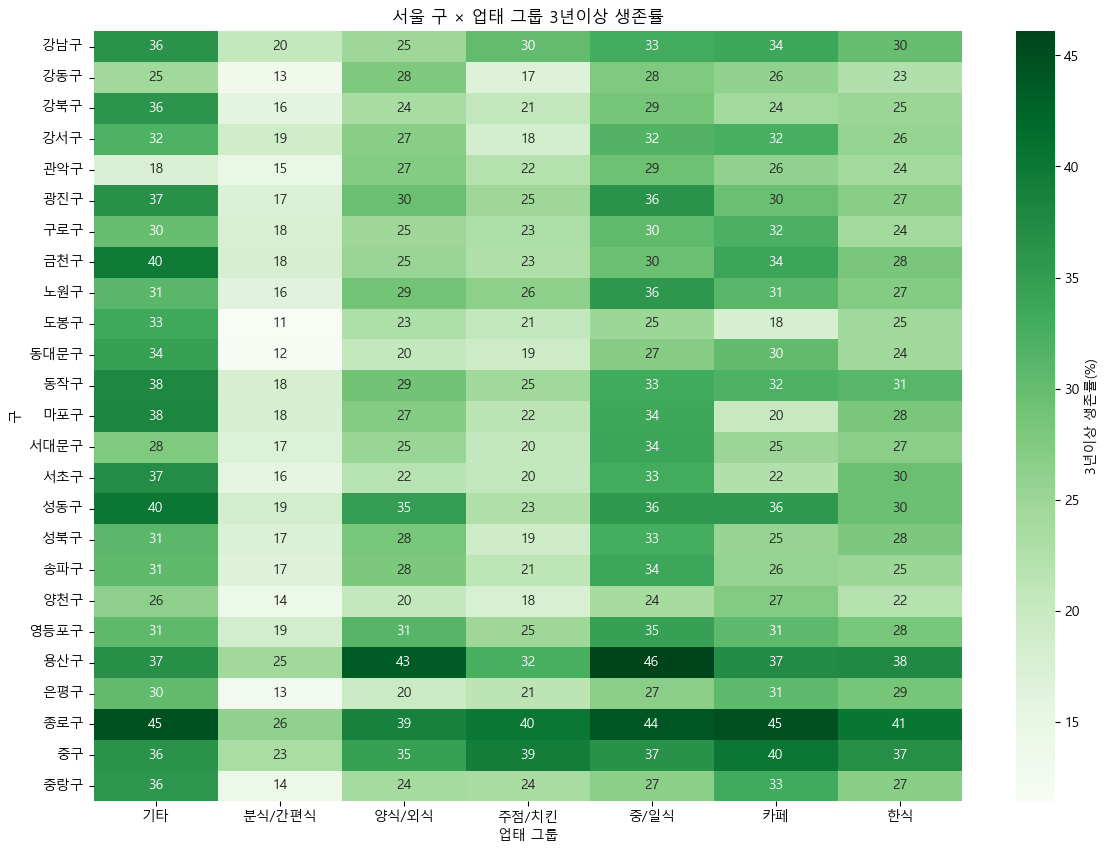

In [56]:
# 히트맵 시각화
# ===============================
#  히트맵 시각화
# ===============================
plt.figure(figsize=(14,10))
sns.heatmap(
    pivot,
    cmap='Greens',
    annot=True,
    cbar_kws={'label': '3년이상 생존률(%)'}
)
plt.title('서울 구 × 업태 그룹 3년이상 생존률')
plt.xlabel('업태 그룹')
plt.ylabel('구')
plt.show()


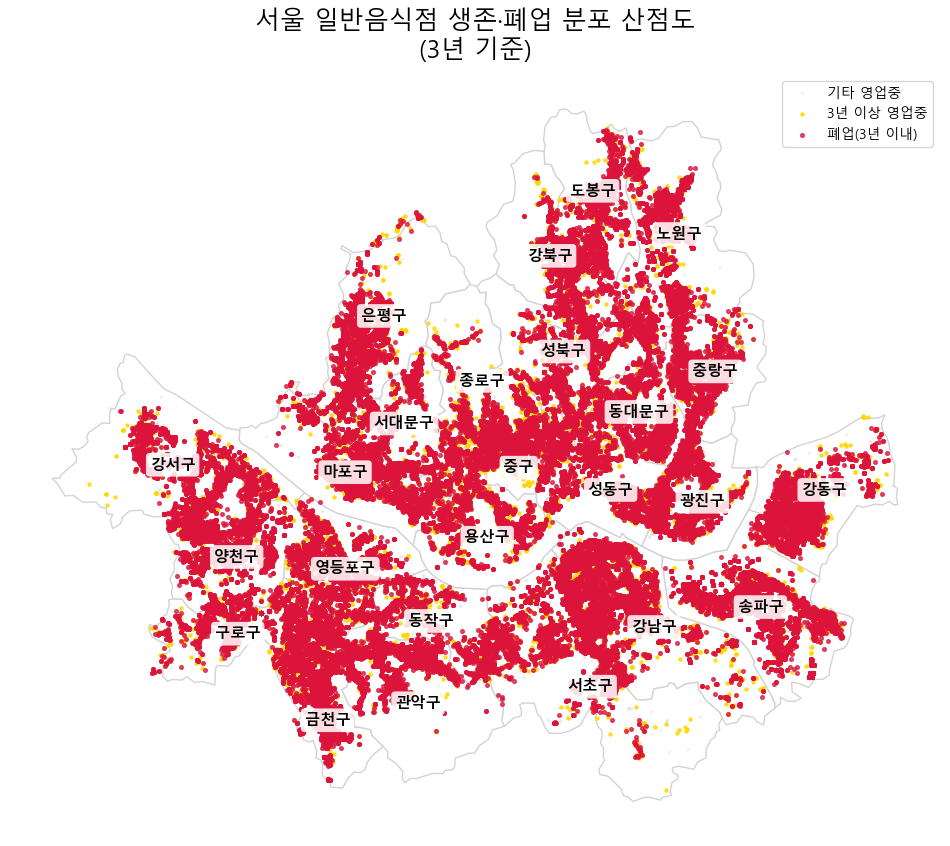

In [57]:
# 서울 지도 좌표계 변환
seoul_map_5174 = seoul_map.to_crs(epsg=5174)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 1️⃣ 배경 지도
seoul_map_5174.plot(
    ax=ax,
    color='white',
    edgecolor='lightgray',
    linewidth=1
)

# 2️⃣ 기타 영업중 (배경)
gdf_points[gdf_points['상태'] == '기타'].plot(
    ax=ax,
    markersize=2,
    color='lightgray',
    alpha=0.2,
    label='기타 영업중'
)

# 3️⃣ 🟡 3년 이상 영업중 (생존)
gdf_points[gdf_points['상태'] == '3년 이상 영업중'].plot(
    ax=ax,
    markersize=5,
    color='gold',
    alpha=0.8,
    label='3년 이상 영업중'
)

# 4️⃣ 🔴 폐업 (3년 이내)
gdf_points[gdf_points['상태'] == '폐업(3년 이내)'].plot(
    ax=ax,
    markersize=7,
    color='crimson',
    alpha=0.75,
    label='폐업(3년 이내)'
)

# 5️⃣ 구 이름 표시 (centroid)
for idx, row in seoul_map_5174.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(
        x, y,
        row['구'],
        fontsize=11,              # 글자 키움
        fontweight='bold',        # 굵게
        ha='center',
        va='center',
        color='black',
        bbox=dict(                # ⭐ 핵심
            boxstyle='round,pad=0.25',
            facecolor='white',
            edgecolor='none',
            alpha=0.85
        )
    )

# 6️⃣ 제목
ax.set_title(
    '서울 일반음식점 생존·폐업 분포 산점도\n(3년 기준)',
    fontsize=18,
    pad=12
)

ax.legend()
ax.axis('off')
plt.show()


In [58]:
category_colors = {
    '한식': '#e41a1c',
    '분식/간편식': '#377eb8',
    '양식/외식': '#4daf4a',
    '중·일식': '#984ea3',
    '주점/치킨': '#ff7f00',
    '카페': '#a65628',
    '기타': '#999999'
}


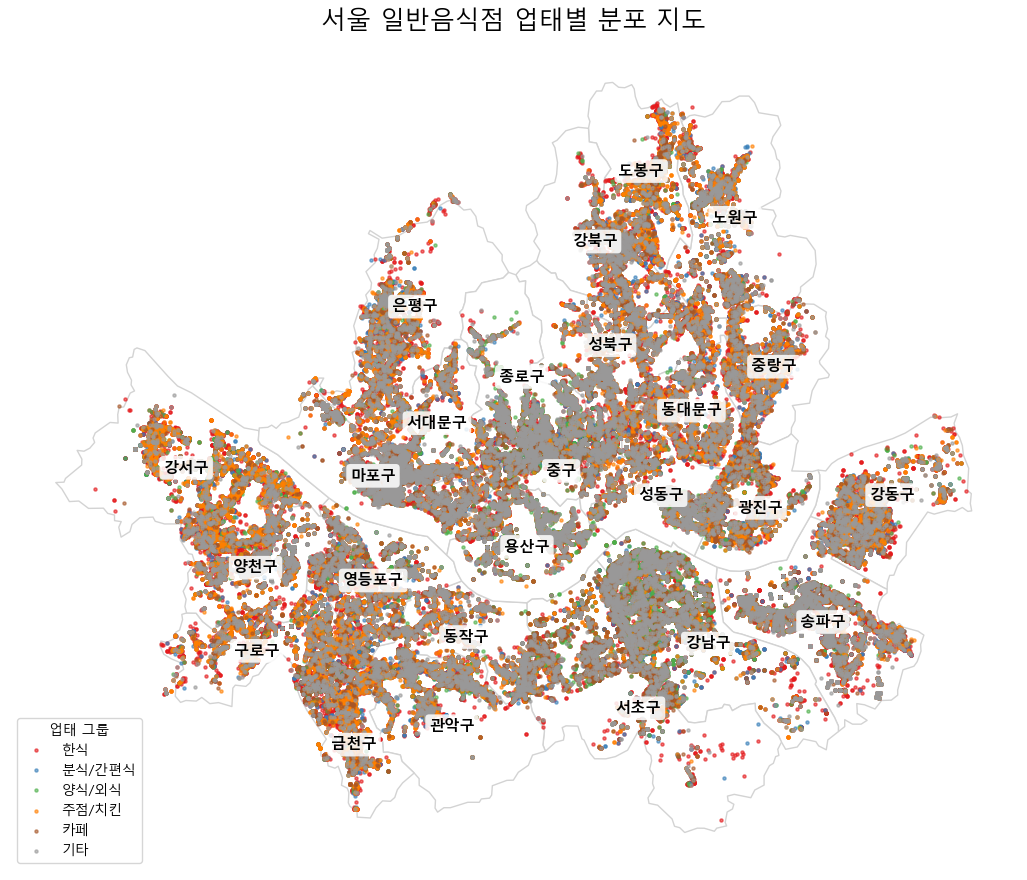

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(13, 13))

# 1️⃣ 배경 지도
seoul_map_5174.plot(
    ax=ax,
    color='white',
    edgecolor='lightgray',
    linewidth=1
)

# 2️⃣ 업태별 포인트 찍기
for category, color in category_colors.items():
    subset = gdf_points[gdf_points['업태_그룹'] == category]
    if len(subset) == 0:
        continue

    subset.plot(
        ax=ax,
        markersize=5,
        color=color,
        alpha=0.6,
        label=category
    )

# 3️⃣ 구 이름 표시
for _, row in seoul_map_5174.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(
        x, y,
        row['구'],
        fontsize=11,
        fontweight='bold',
        ha='center',
        va='center',
        bbox=dict(
            boxstyle='round,pad=0.25',
            facecolor='white',
            alpha=0.85,
            edgecolor='none'
        )
    )

# 4️⃣ 제목 & 옵션
ax.set_title(
    '서울 일반음식점 업태별 분포 지도',
    fontsize=18,
    pad=12
)
ax.legend(title='업태 그룹', loc='lower left')
ax.axis('off')

plt.show()


In [60]:
# 3년 생존 판정 가능한 표본만(= '기타' 제외)
df2 = df[df["상태"].isin(["폐업(3년 이내)", "3년 이상 영업중"])]

In [61]:
# 창업월 × 업태그룹 3년 이상 생존률(%)
pivot_month = (
    df2.pivot_table(
        index="창업월",
        columns="업태_그룹",
        values="생존_3년이상",
        aggfunc="mean"
    ) * 100
).reindex(range(1, 13))  # 1~12월 순서 고정

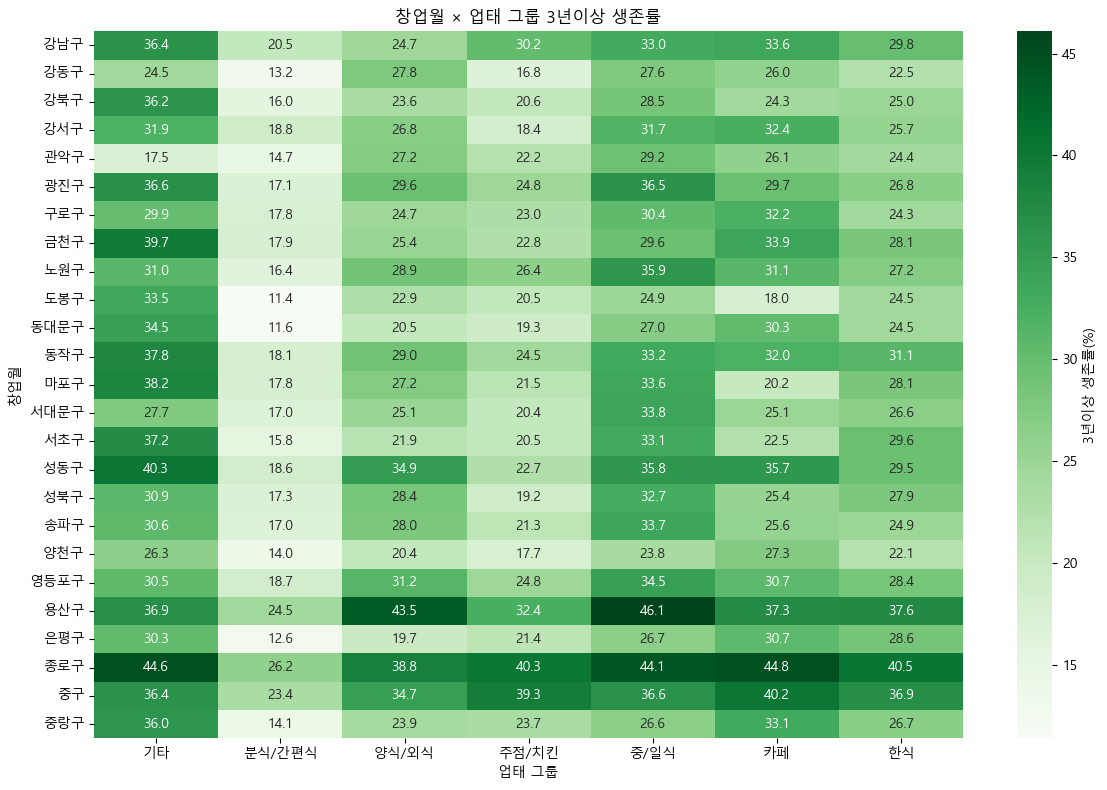

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot,
    cmap="Greens",
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "3년이상 생존률(%)"}
)
plt.title("창업월 × 업태 그룹 3년이상 생존률")
plt.xlabel("업태 그룹")
plt.ylabel("창업월")
plt.tight_layout()
plt.show()

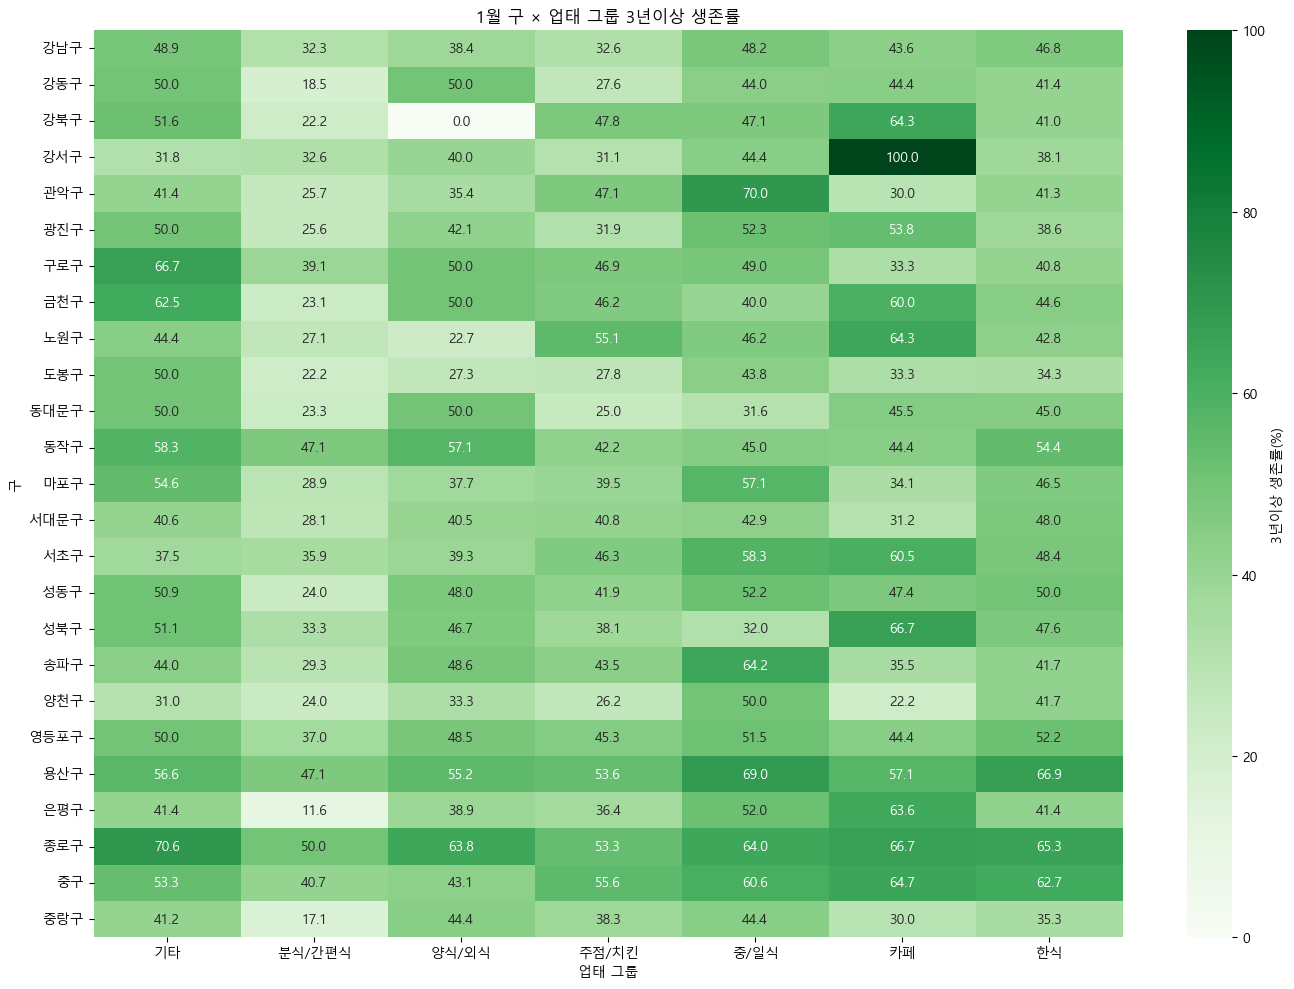

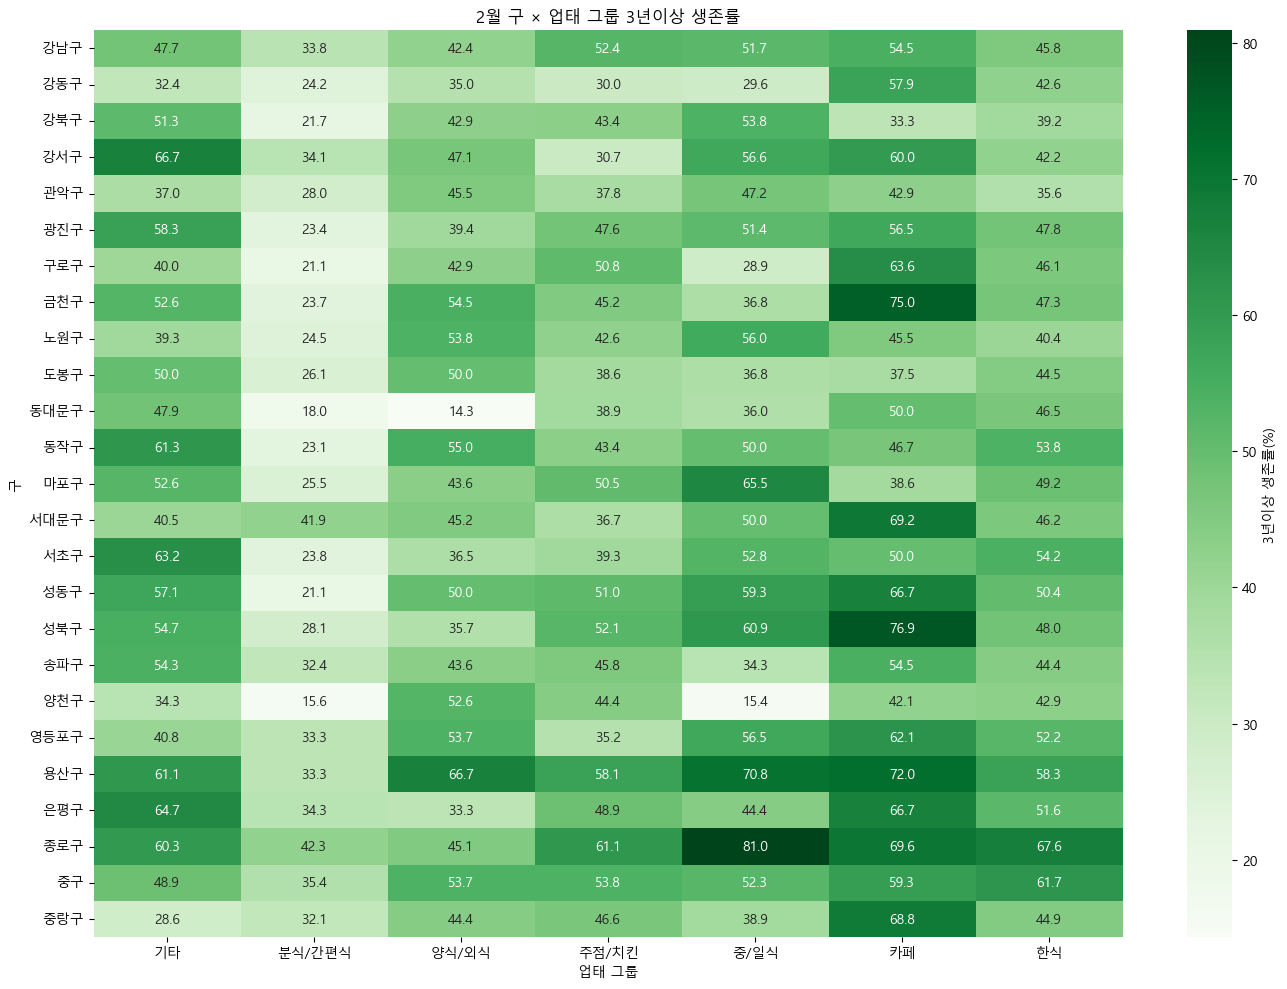

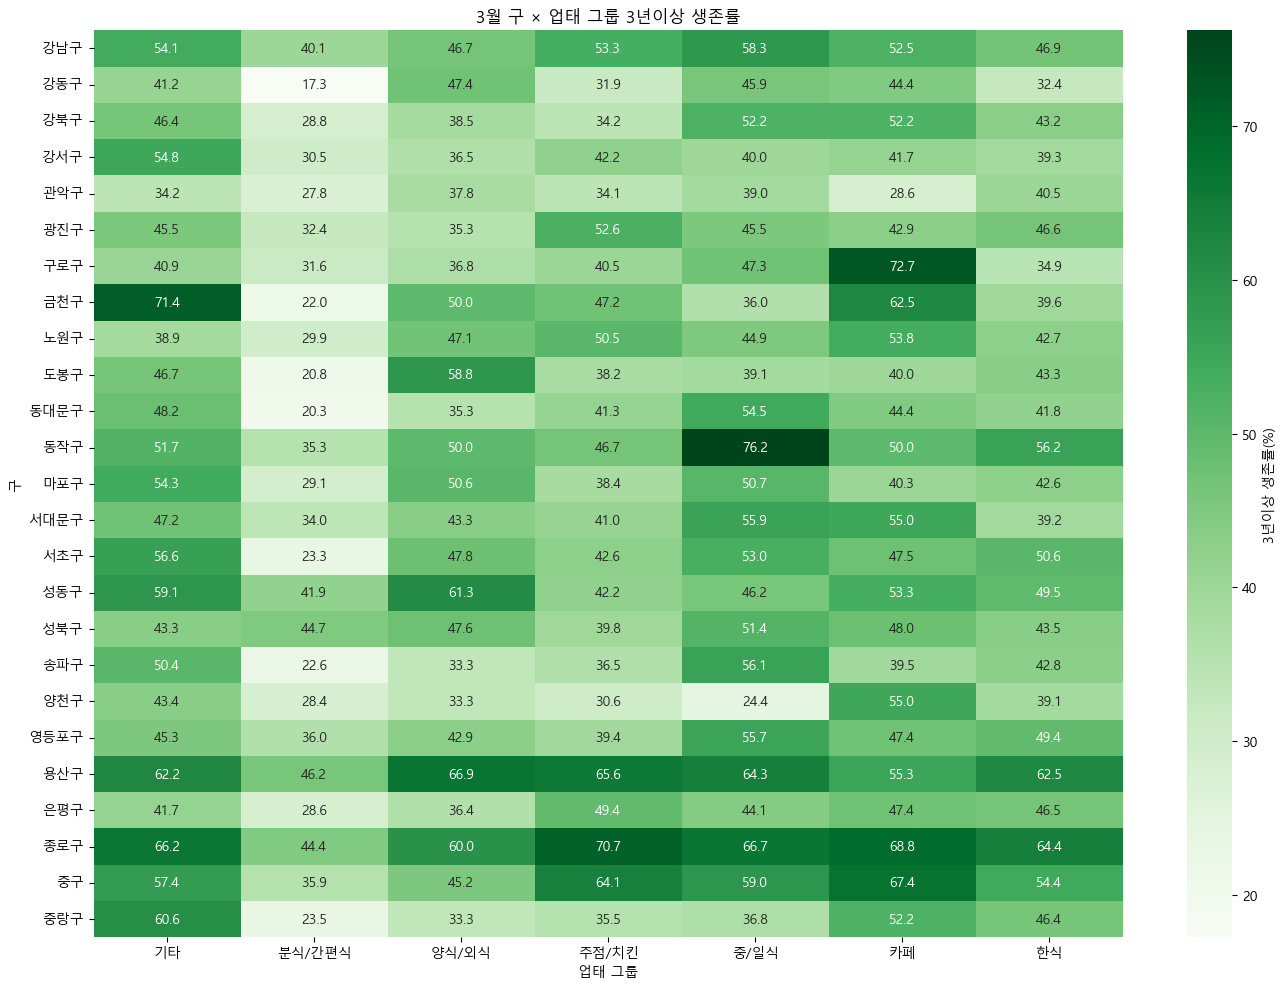

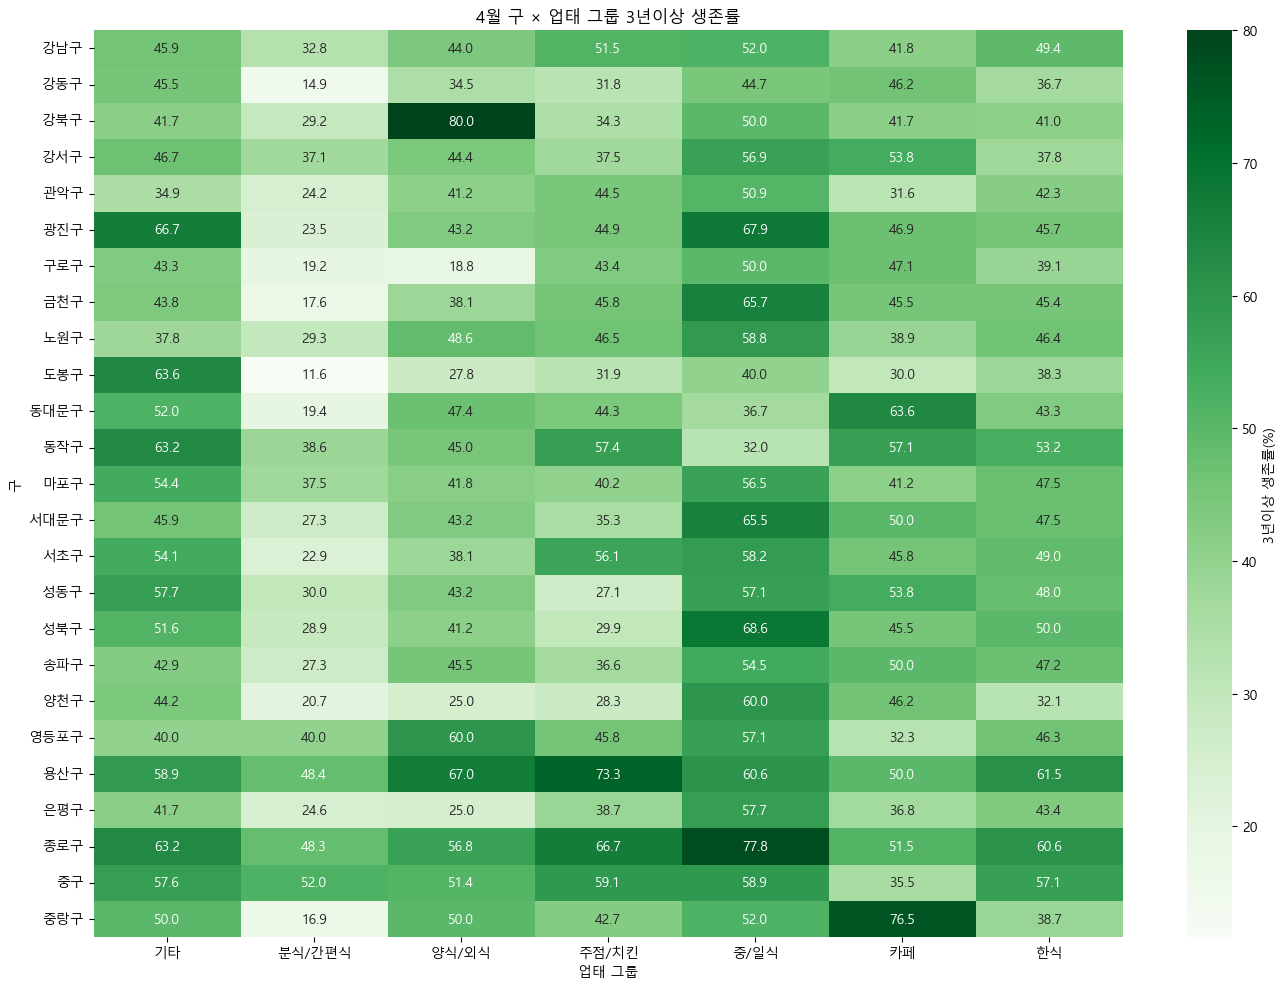

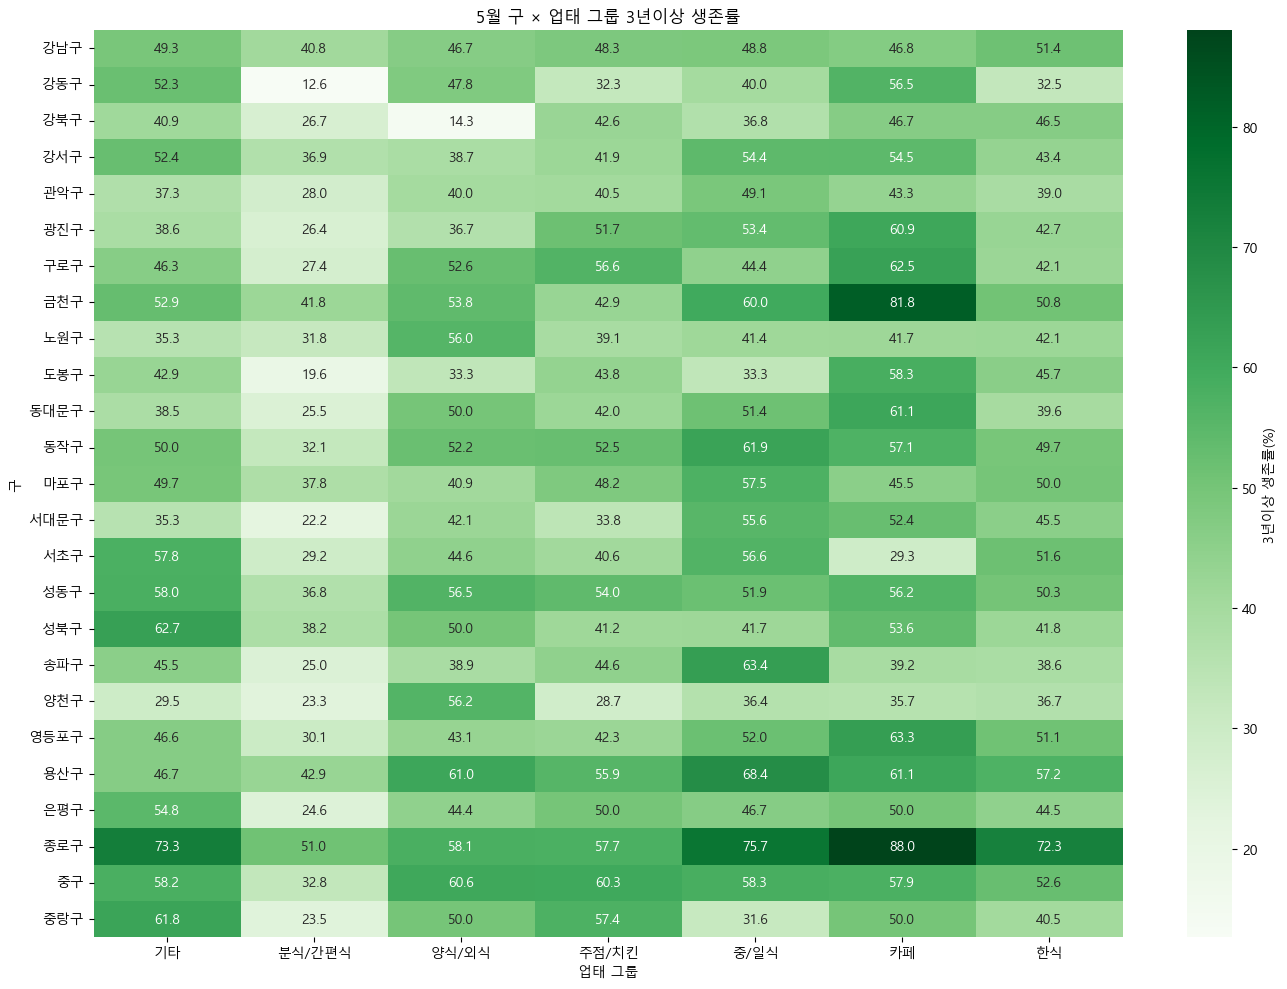

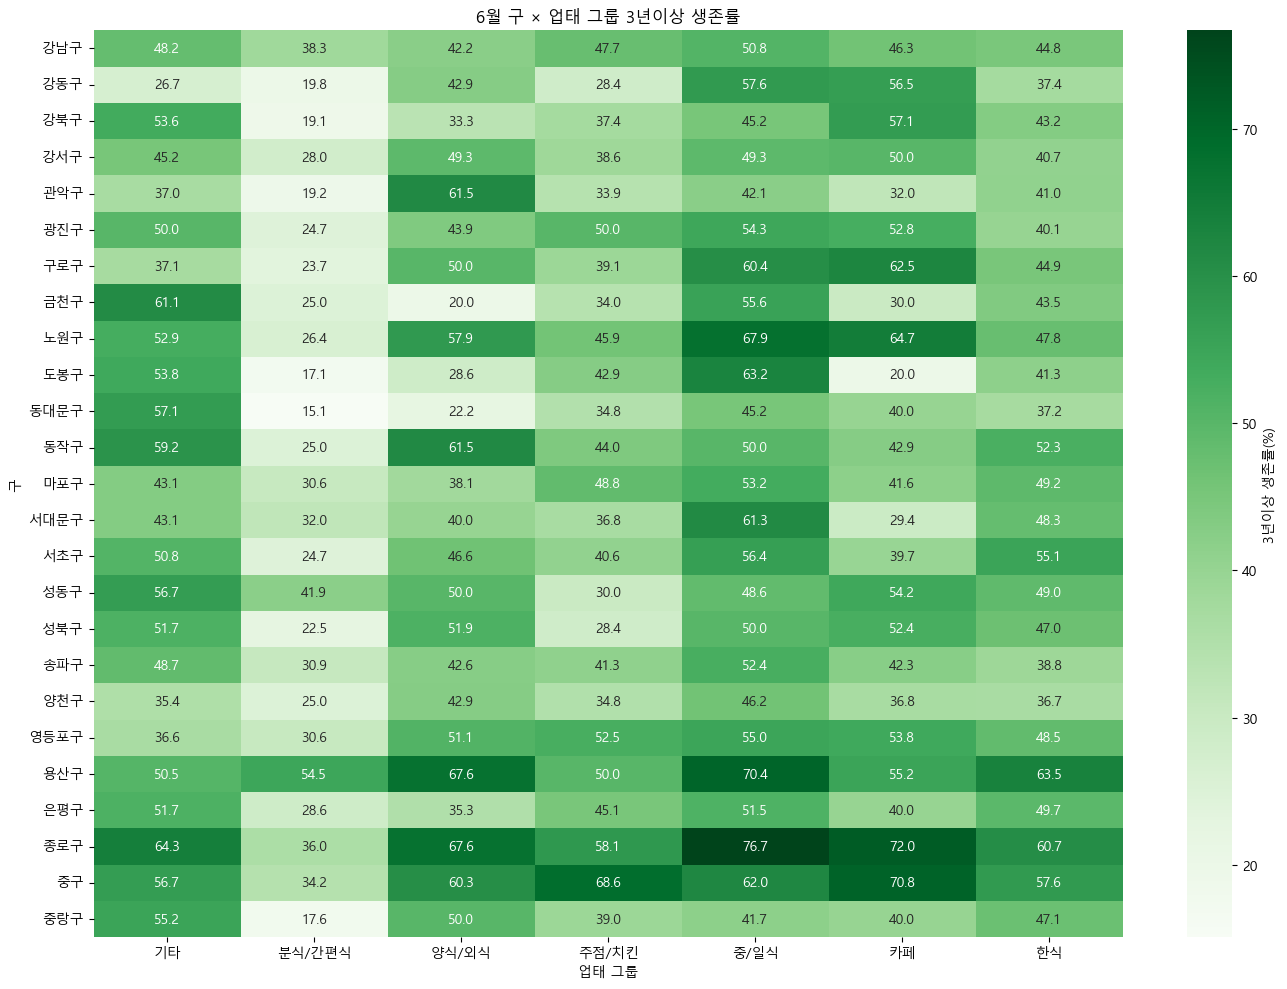

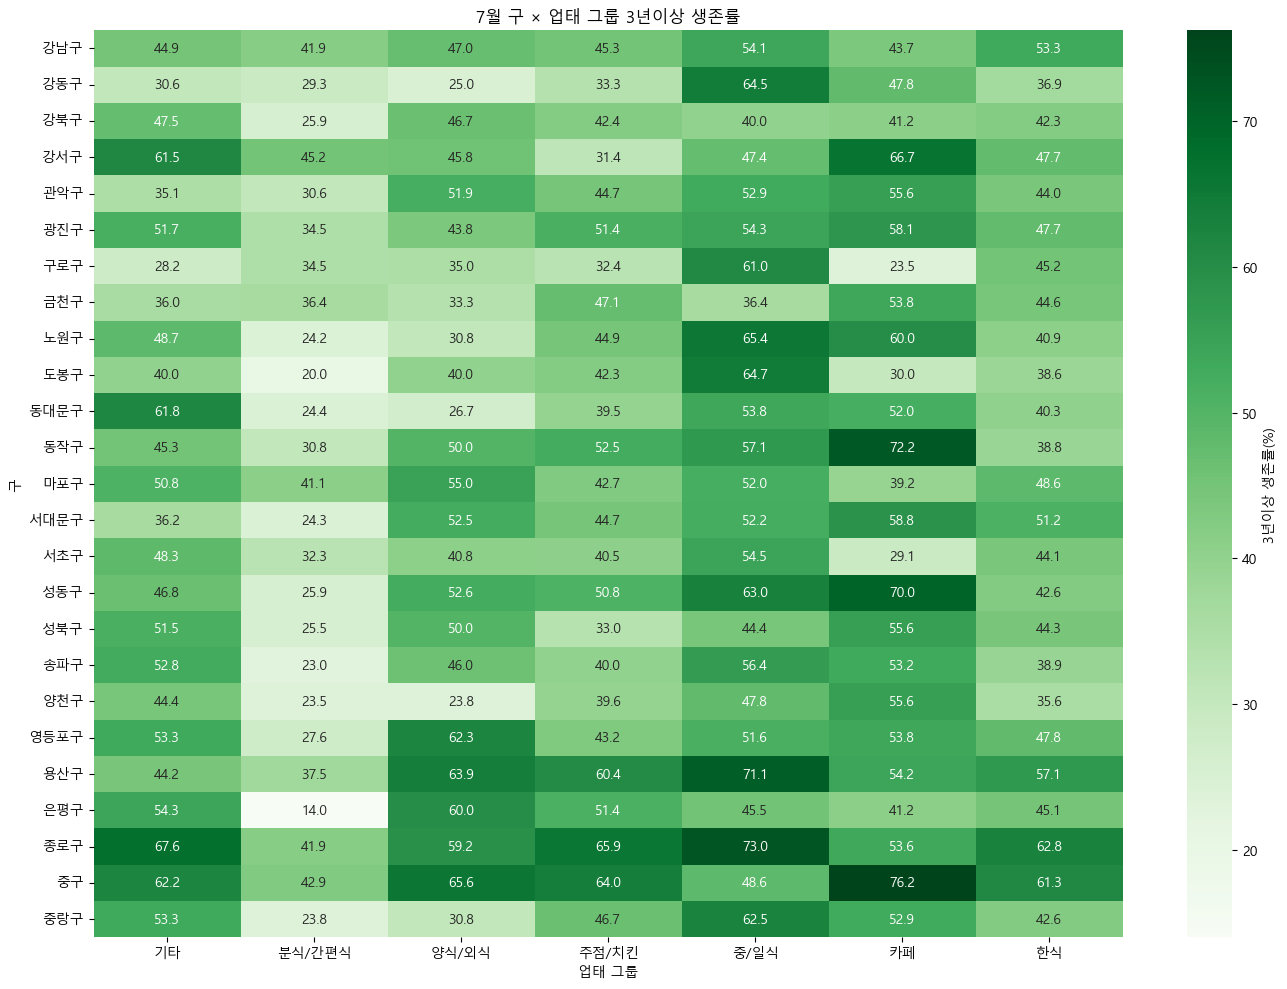

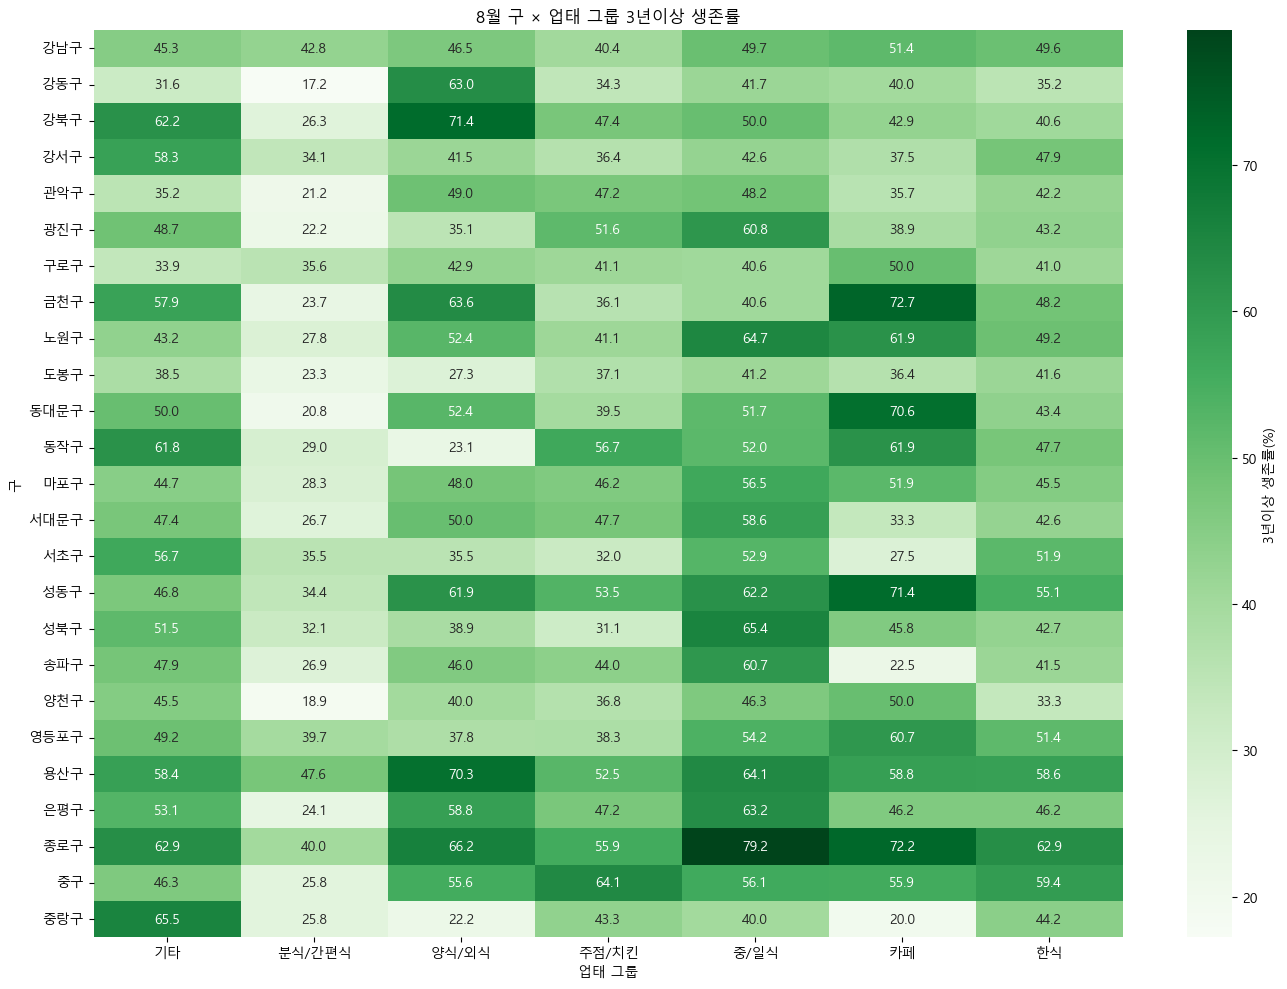

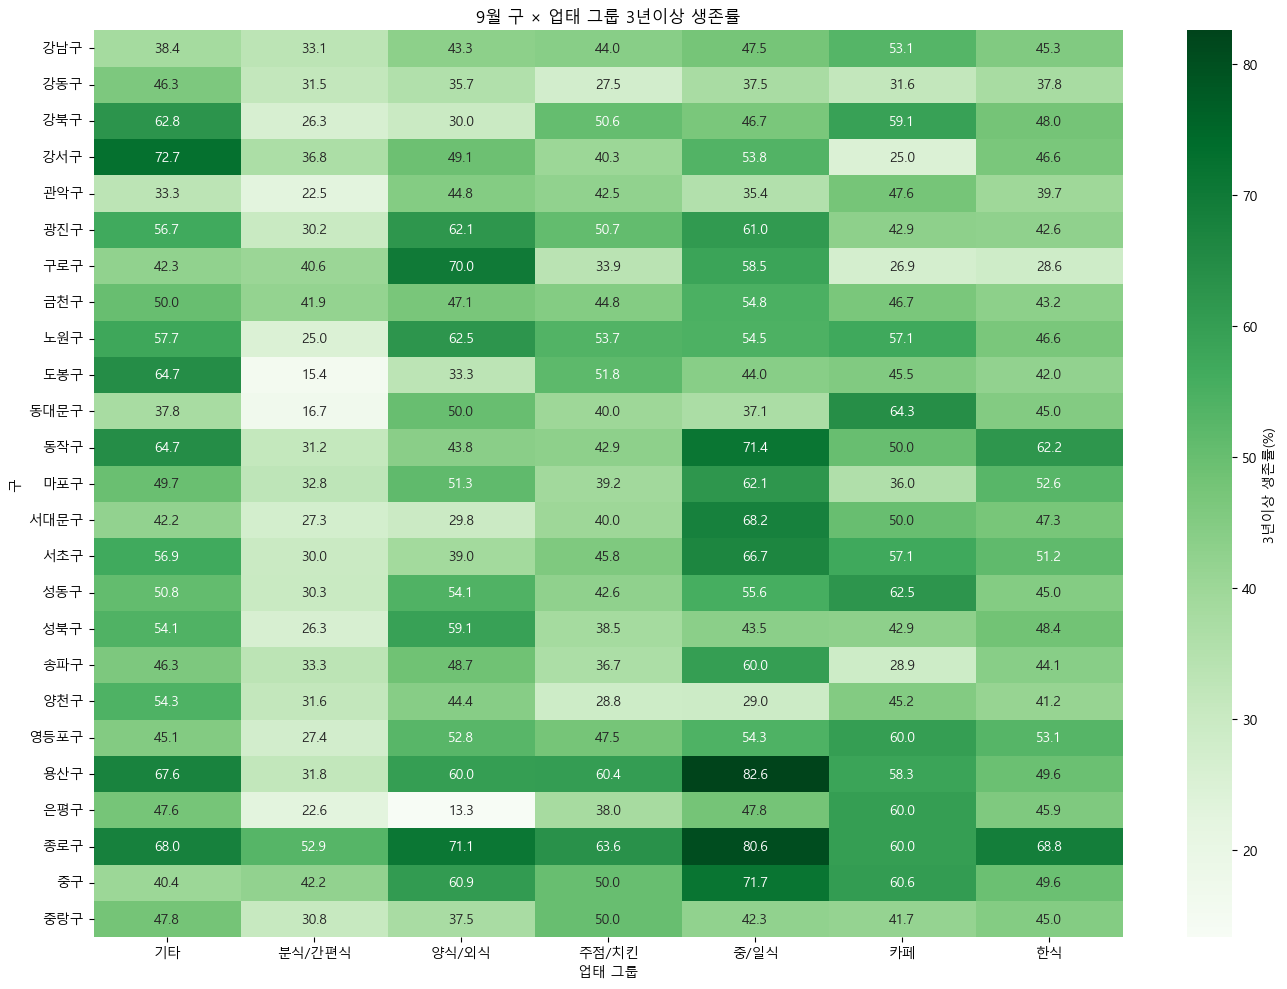

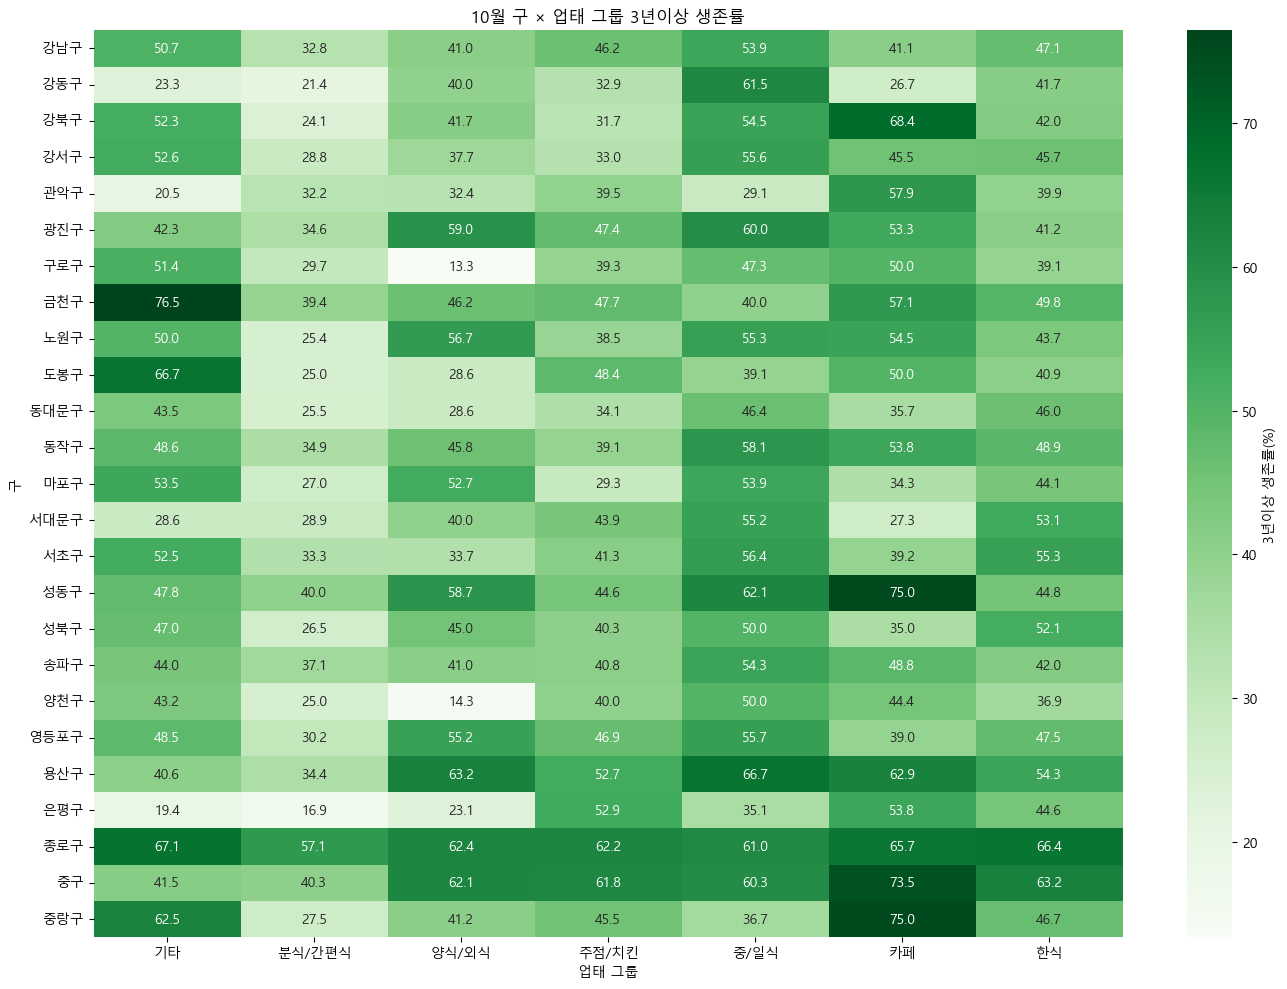

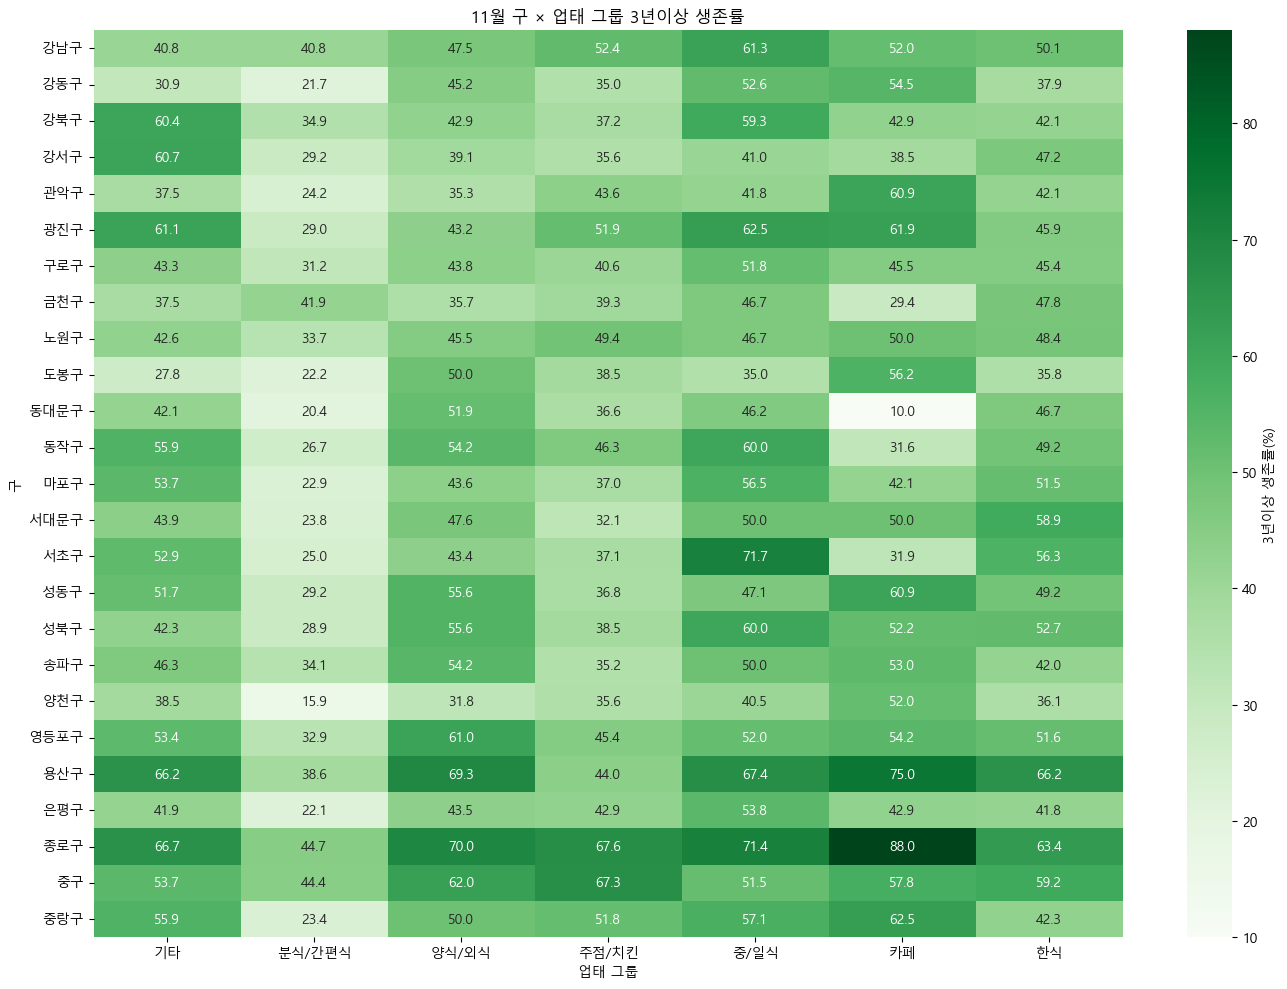

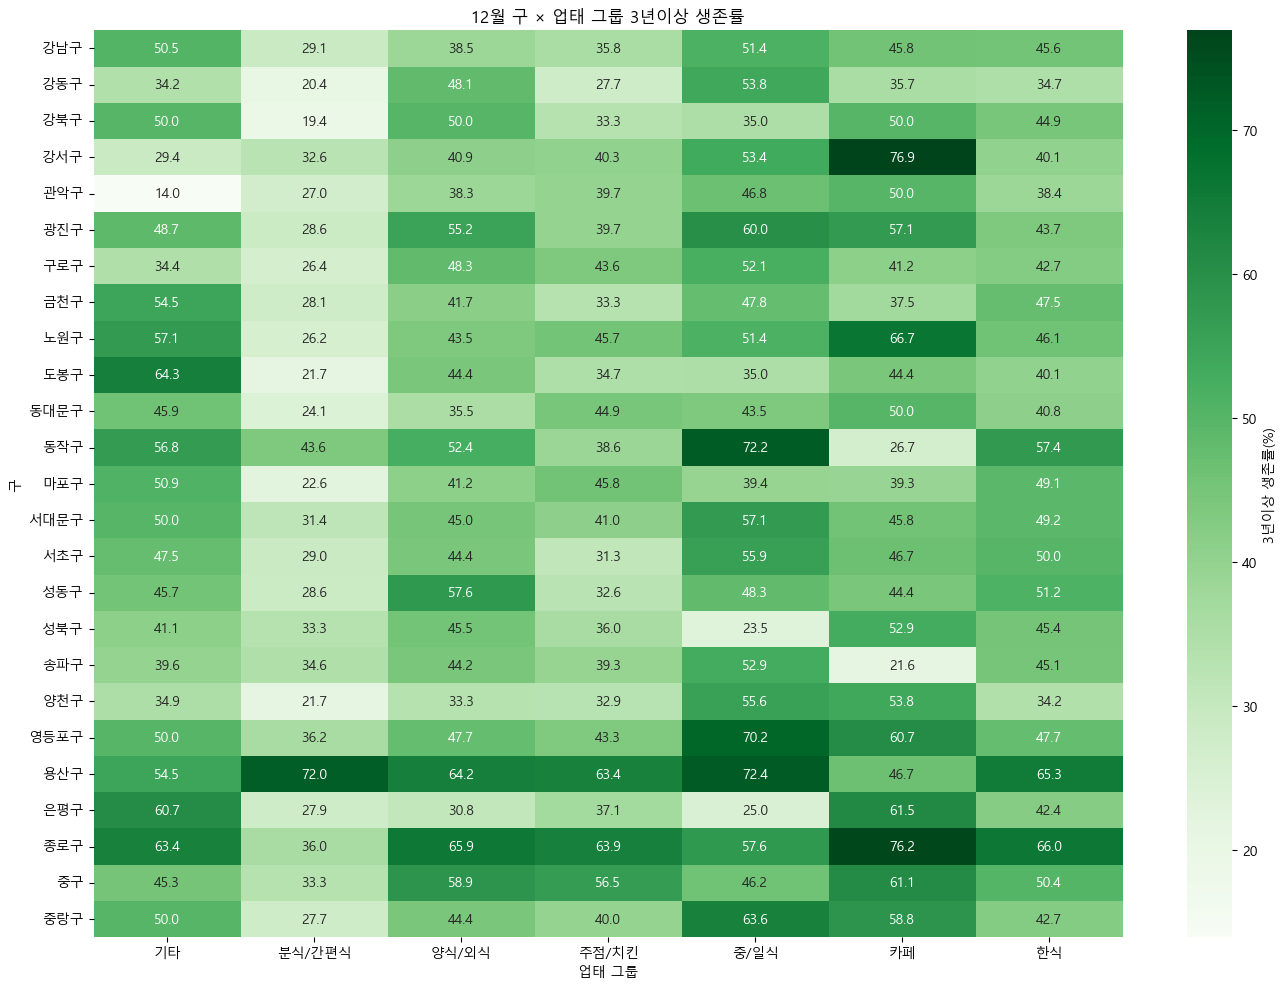

In [63]:
# 3년 생존 판정 가능한 표본만(= '기타' 제외)
df2 = df[df["상태"].isin(["폐업(3년 이내)", "3년 이상 영업중"])].copy()

for m in range(1, 13):
    df_m = df2[df2["창업월"] == m]

    pivot = (
        df_m.pivot_table(
            index="구",
            columns="업태_그룹",
            values="생존_3년이상",
            aggfunc="mean"
        ) * 100
    )

    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(
        pivot,
        cmap="Greens",
        annot=True,
        fmt=".1f",
        cbar_kws={"label": "3년이상 생존률(%)"}
    )

    plt.title(f"{m}월 구 × 업태 그룹 3년이상 생존률")
    plt.xlabel("업태 그룹")
    plt.ylabel("구")

    # x축 라벨 가로
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")

    plt.tight_layout()
    plt.show()

In [64]:
df.to_csv(
    r"C:\ai\lecNote\1st_Project\data\서울_일반음식점_정제.csv",
    index=False,
    encoding="utf-8-sig"
)


In [65]:
import pandas as pd

INPUT_CSV = r"C:\ai\lecNote\1st_Project\data\서울_일반음식점_정제.csv"
OUT_CSV   = r"C:\ai\lecNote\1st_Project\data\서울_일반음식점_라벨3처리.csv"

CUTOFF_DAYS = 365 * 3  # 1095일

df = pd.read_csv(INPUT_CSV)

# 필수
if "영업일수" not in df.columns or "폐업_3년이내" not in df.columns:
    raise ValueError(f"필수 컬럼 누락. 현재 컬럼: {list(df.columns)}")

df["영업일수"] = pd.to_numeric(df["영업일수"], errors="coerce")
df["폐업_3년이내"] = pd.to_numeric(df["폐업_3년이내"], errors="coerce")
df = df.dropna(subset=["영업일수", "폐업_3년이내"]).copy()

# 1) 기본 조건: 3년 미만
mask_lt3y = df["영업일수"] < CUTOFF_DAYS

# 2) '영업중' 판별 (가능한 컬럼을 우선순위로 사용)
# (우선) 상세영업상태명으로 판별
if "상세영업상태명" in df.columns:
    s = df["상세영업상태명"].astype(str)
    # '영업', '정상' 포함 & '폐업/말소/취소' 제외
    mask_open = s.str.contains("영업|정상", na=False) & ~s.str.contains("폐업|말소|취소", na=False)

# (다음) 폐업일자 결측이면 영업중으로 판별
elif "폐업일자" in df.columns:
    mask_open = df["폐업일자"].isna()

# (마지막 차선) 정보가 없으면: 기존 라벨이 0인 3년 미만을 검열로 간주
else:
    mask_open = (df["폐업_3년이내"] == 0)

# 3) 덮어쓰기: 3년 미만 + 영업중 => 3 (검열)
mask_censored = mask_lt3y & mask_open
df.loc[mask_censored, "폐업_3년이내"] = 3

# 저장 (엑셀 호환 utf-8-sig)
df.to_csv(OUT_CSV, index=False, encoding="utf-8-sig")

print("저장 완료:", OUT_CSV)
print("라벨 분포:\n", df["폐업_3년이내"].value_counts(dropna=False))

저장 완료: C:\ai\lecNote\1st_Project\data\서울_일반음식점_라벨3처리.csv
라벨 분포:
 0    190688
1     92955
3        96
Name: 폐업_3년이내, dtype: int64


In [9]:
import pandas as pd

df = pd.read_csv(r"C:\ai\lecNote\1st_Project/data/서울_일반음식점_라벨3처리.csv", encoding="utf-8")

# 인허가일자 -> datetime (YYYYMMDD / YYYY-MM-DD 등 섞여 있어도 처리)
s = df["인허가일자"].astype(str).str.strip()
s = s.where(~s.str.fullmatch(r"\d{8}"), s.str.slice(0,4) + "-" + s.str.slice(4,6) + "-" + s.str.slice(6,8))
df["인허가일자_dt"] = pd.to_datetime(s, errors="coerce")

# ✅ 2022년도까지(2022-12-31 포함)만 남기기
df_2022 = df[df["인허가일자_dt"] <= "2022-12-31"].copy()

print(df_2022.shape)
df_2022.head()

# (선택) 저장
df_2022.to_csv("서울_일반음식점_인허가일자_2022까지.csv", index=False, encoding="utf-8-sig")


C:\Users\Admin\AppData\Local\Temp\ipykernel_8664\569107121.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\ai\lecNote\1st_Project/data/서울_일반음식점_라벨3처리.csv", encoding="utf-8")


(283739, 23)
